In [2]:
!pip install tensorflow

  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4847 sha256=69aece1dcdeb7d1cda9e4128c71c2dcbcbb59400f847788a3a8c9edc48bf6cfe
  Stored in directory: c:\users\y0010\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501
Successfully built termcolor
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.21.1
    Uninstalling protobuf-4.21.1:
      Successfully uninstalled protobuf-4.21.1
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.23.0 which is incompatible.
pandas-profiling 3.2.0 requires markupsafe~=2.1.1, but you have markupsafe 2.0.1 which is incompatible.
numba 0.54.1 requires numpy<1.21,>=1.17, but you have numpy 1.23.0 which is incompatible.


In [9]:
# import tensorflow as tf

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [11]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # https://stackoverflow.com/questions/35911252/disable-tensorflow-debugging-information

In [12]:
a = tf.add(3,5)
print(a)

Tensor("Add_1:0", shape=(), dtype=int32)


In [15]:
sess = tf.Session()
print(sess.run(a))

8


In [ ]:
# 세션을 시작할때 보통 이런식으로 사용한다.
with tf.Session() as sess:
    print(sess.run(a))

In [19]:
x =2
y = 3
op1 = tf.add(x,y) # 2+3
op2 = tf.multiply(x,y) # 2x3
op3 = tf.pow(op2, op1) # 6^5

In [20]:
with tf.Session() as sess:
    op3 = sess.run(op3)
    print(op3)

7776


In [21]:
6**5

7776

In [22]:
sess.close()

#### 1. Prepare the data

In [6]:
x_data = datasets.load_boston().data[:, 12] # 주변 이웃 중 하위 계층의 비율
y_data = datasets.load_boston().target # 집의 가격 (in $1,000s)
df = pd.DataFrame([x_data, y_data]).transpose()
df.head()

,0,1
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


#### 2. Build the model

In [5]:
w = tf.Variable(tf.random_normal([1]))
b = tf.Variable(tf.random_normal([1]))

y_predicted = w * x_data + b 

#### 3. Set the criterion

In [6]:
loss = tf.reduce_mean(tf.square(y_predicted - y_data))
optimizer = tf.train.GradientDescentOptimizer(0.001)
train = optimizer.minimize(loss)

#### 4. Train the model

In [7]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer()) 

    for step in range(10000):
        sess.run(train)
        if step % 1000 == 0:
            print('Step {}: w {} b {}'.format(step, sess.run(w), sess.run(b)))
            print('loss {}'.format(sess.run(loss)))
            print()

    w_out, b_out = sess.run([w, b]) 

Step 0: w [0.6634426] b [0.47269833]
loss 357.7247619628906

Step 1000: w [0.31408536] b [13.497991]
loss 145.42384338378906

Step 2000: w [-0.16845566] b [21.535355]
loss 79.3637466430664

Step 3000: w [-0.4668011] b [26.504698]
loss 54.11075210571289

Step 4000: w [-0.6512644] b [29.577179]
loss 44.45709228515625

Step 5000: w [-0.7653142] b [31.476831]
loss 40.766754150390625

Step 6000: w [-0.835831] b [32.651382]
loss 39.355995178222656

Step 7000: w [-0.87942994] b [33.37758]
loss 38.81670379638672

Step 8000: w [-0.90638626] b [33.826576]
loss 38.61054992675781

Step 9000: w [-0.92305255] b [34.104176]
loss 38.531734466552734



#### 5. Visualize trained model

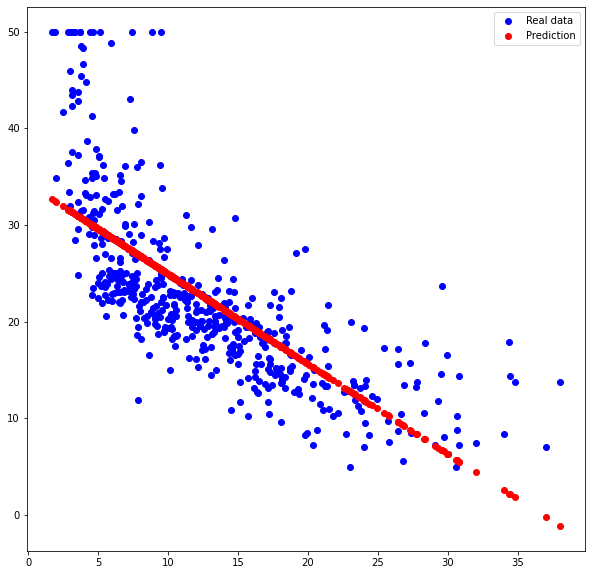

In [8]:
plt.figure(figsize = (10,10))
plt.plot(x_data, y_data, 'bo', label='Real data')
plt.plot(x_data, x_data * w_out + b_out, 'ro', label='Prediction')
plt.legend()
plt.show()

#### + Appendix. Gradient Descent 단계마다 Trained model 그리기(Plotting)

In [10]:
# with tf.Session() as sess:
#     sess.run(tf.global_variables_initializer()) 

#     for step in range(10000):
#         sess.run(train)
#         if step % 1000 == 0:
#             print('Step {}: w {} b {}'.format(step, sess.run(w), sess.run(b)))
#             print('loss {}'.format(sess.run(loss)))
            
#             plt.figure(figsize = (10,10))
#             plt.plot(x_data, y_data, 'bo', label='Real data')
#             plt.plot(x_data, x_data * sess.run(w) + sess.run(b), 'ro', label='Prediction')
#             plt.legend()
#             plt.show()
#             print()

#     w_out, b_out = sess.run([w, b]) 